# K-Vector Model (Elvin Profile)

# Camera Spec

### [Nexus-5 Spec](https://www.devicespecifications.com/en/model/d23f3709)
### - front camera
- OmniVision OV5693
- Sensor size 3.67 x 2.74 mm 
- 2.6mm (사진으로 촬여했을 때)


<br>

### Nexus-5x 전면 카메라

|resolution|fx|cx|fy|cy|k1|k2|p1|p2|k3|
|---|---|---|---|---|---|---|---|---|---|
|1920x1080|1433.4389|587.7184|1437.476|604.914|-0.4355|0.6174|-0.0008|-0.0049|-0.3697|
|1080x720|946.2767|612.9987|950.3305|326.0792|0.0438|-0.6156|-0.0125|-0.004|0.5669|

<br>


# imports

In [1]:
import sys
import cv2
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense, Activation

sys.path.append("../../../")
%matplotlib inline

%run ../../../ac/common/videos.py
%run ../../../ac/visualizer/plotter.py
%run ../../../ac/images/orientations.py
%run ../../../al/optics/parameter.py
%run ../../../al/optics/projection.py
%run ../../../al/actor/face.py
%run ../../../al/actor/screen.py
%run ../../../al/feature/face/candide.py
%run ../../../ai/predictor/eyes/optical_axis.py
%run ../../../ds/device/nexus-5x.py

Using TensorFlow backend.


# resource paths

In [2]:
candide_path="/home/chy/archive-model/candide/candide.npz"
land_mark_path="/home/chy/archive-model/candide/shape_predictor_68_face_landmarks.dat"
model_path = "/home/chy/archive-model/incubator/ove/exp-home2-model.json"
weight_path = "/home/chy/archive-model/incubator/ove/exp-home2-24e-weights.hdf5"
sample_path = "/home/chy/dev-bench/auto-catch/notes/research/visual-optics/elvin-profile/"

# preprocess images (elvin profile)

In [3]:
# video to frames
# video_path = "{}/vids/1280-720.mp4".format(sample_path)
# save_path = "{}/frames/".format(sample_path)
# video_to_frames(video_path, save_path)

In [4]:
# frame_path = "{}/frames/".format(sample_path)
# apply_rotate_to_images(frame_path, 90)

# prepare data

In [5]:
def load_img(idx):
    base_path = "/home/chy/dev-bench/auto-catch/notes/research/visual-optics/elvin-profile/samples"
    img_path = "{}/{}.jpg".format(base_path, idx)
    return cv2.imread(img_path)

imgs = []
for idx in range(10):
    img = load_img(idx)
    imgs.append(img)

# Face Module

In [6]:
candide = Candide(candide_path, land_mark_path)

intrinsic_param = IntrinsicParameters(946.2767, 950.3305, 612.9987, 326.0792)
screen = Screen(720, 1080)
camera = Camera(2.6, intrinsic_param, screen)

opt_predictor = OpticalAxisPredictor()
opt_predictor.load_model(model_path, weight_path)
face_model = FaceModel(candide)
face = Face(camera, face_model, opt_predictor)

# 검증

In [7]:
lk_vec, rk_vec = Vector3D(0,0,0), Vector3D(0,0,0)

In [12]:
def shot(idx, side="r"):
    def select(refs, side):
        pos = refs["{}_pos".format(side)]
        opt = refs["{}_opt".format(side)]
        tar = refs["{}_tar".format(side)]
        return pos, opt, tar

    def report(face):
        show_pair_images([[face.l_eye_img, face.r_eye_img]])
        # show_image(face.frame, extent=(0,720,0,1080))
        pos, opt, tar = select(face.get_references(), side)
        tx, ty = get_true_cam_xy(idx)
        print("[{}] ---------------------------------------------".format(idx))
        print("pos {}".format(pos))
        print("opt {}".format(opt.focal_proj(-1)))
        print("opt YP {}".format(opt.to_yaw_pitch()))
        print("tar {} / truth ({},{})".format(tar, tx, ty))

    face.match(imgs[idx])
    face.analysis()
    face.compute_gaze_target_pos_in_mm(lk_vec, rk_vec)
    report(face)

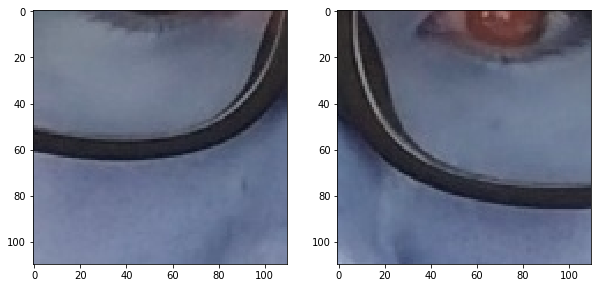

[0] ---------------------------------------------
pos (-38.80 82.51 185.18)
opt [ 0.11694876 -0.00660013 -1.        ]
opt YP (-6.670370427397269, 0.3755941835322639)
tar (-17.14 81.28 0.00) / truth (-22,66)


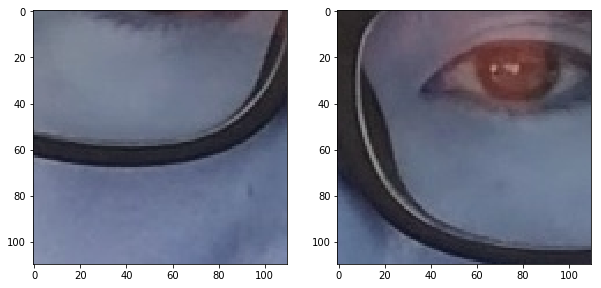

[1] ---------------------------------------------
pos (-37.61 75.17 178.40)
opt [ 0.6780402   0.21599093 -1.        ]
opt YP (-34.138849585043666, -10.135773624509019)
tar (83.35 113.70 0.00) / truth (10,10)


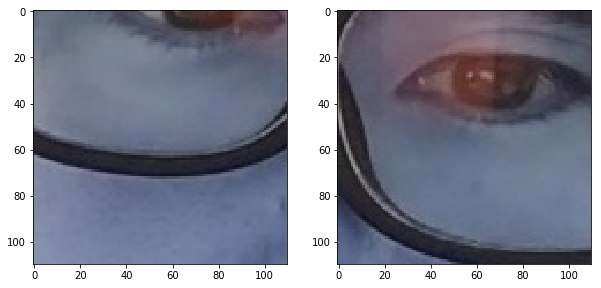

[2] ---------------------------------------------
pos (-29.68 66.44 164.24)
opt [ 0.3166056  0.8611199 -1.       ]
opt YP (-17.568078120804245, -39.38450316950516)
tar (22.32 207.86 0.00) / truth (10,66)


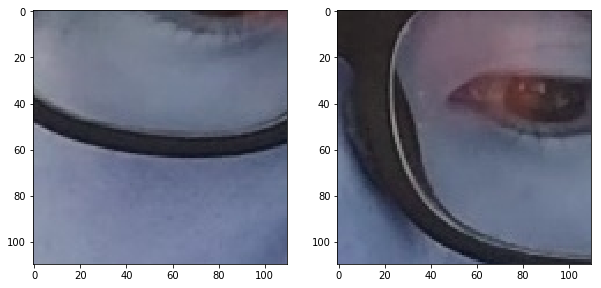

[3] ---------------------------------------------
pos (-31.38 67.06 164.72)
opt [ 0.30855352  0.42537373 -1.        ]
opt YP (-17.147794383058557, -22.120009881835053)
tar (19.45 137.13 0.00) / truth (10,122)


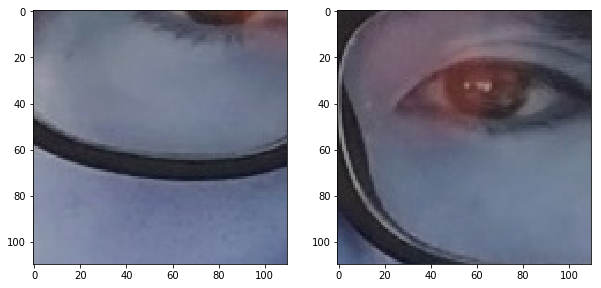

[4] ---------------------------------------------
pos (-26.66 62.28 159.15)
opt [ 0.45171213  0.75262207 -1.        ]
opt YP (-24.30927163347902, -34.445921229749096)
tar (45.23 182.06 0.00) / truth (-22,10)


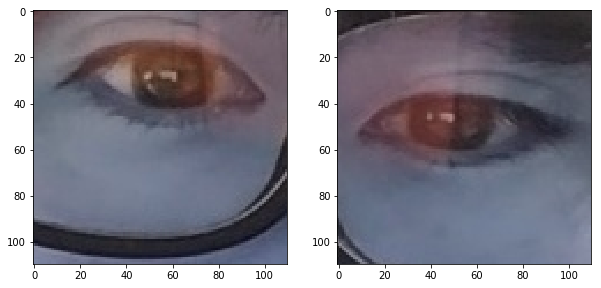

[5] ---------------------------------------------
pos (-25.56 60.76 165.37)
opt [ 0.06324135  0.12063989 -1.        ]
opt YP (-3.618643186896041, -6.86532963951882)
tar (-15.10 80.71 0.00) / truth (-22,66)


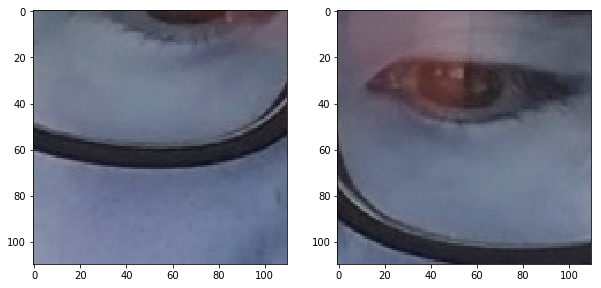

[6] ---------------------------------------------
pos (-24.97 63.14 162.10)
opt [ 0.08991825  0.9538817  -1.        ]
opt YP (-5.138118232395166, -43.53266829775066)
tar (-10.39 217.76 0.00) / truth (-22,122)


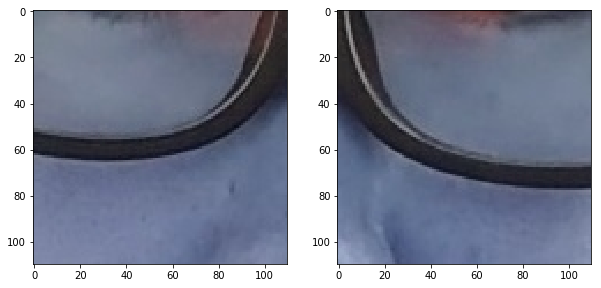

[7] ---------------------------------------------
pos (-30.45 73.89 177.59)
opt [ 0.10198843 -0.08582453 -1.        ]
opt YP (-5.823371475028681, 4.880171015747757)
tar (-12.34 58.65 0.00) / truth (-53,10)


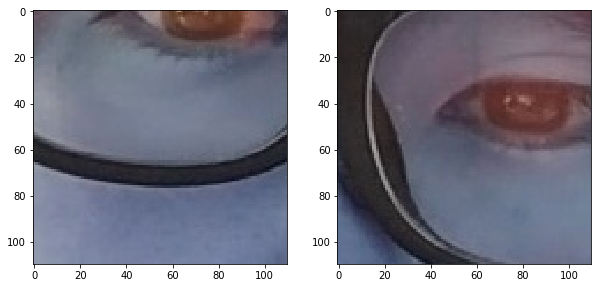

[8] ---------------------------------------------
pos (-33.42 59.44 166.66)
opt [ 0.5061064  0.6353715 -1.       ]
opt YP (-26.844262192983404, -29.548989783551775)
tar (50.93 165.33 0.00) / truth (-53,66)


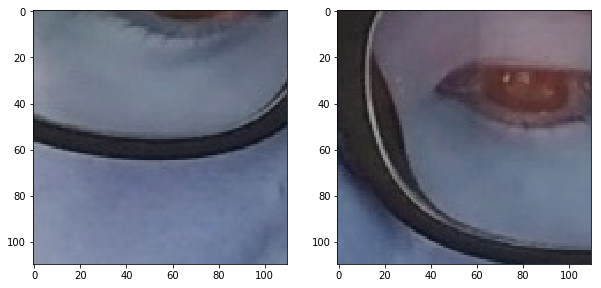

[9] ---------------------------------------------
pos (-33.40 61.49 166.99)
opt [ 0.82047814  0.9369225  -1.        ]
opt YP (-39.36813120606463, -35.91664878825502)
tar (103.61 217.94 0.00) / truth (-53,122)


In [13]:
for i in range(10):
    shot(i)